In [1]:
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_v2/train.csv')
df_val = pd.read_csv('dataset_v2/validation.csv')
df_test = pd.read_csv('dataset_v2/test.csv')

display(df)
display(df_val)
display(df_test)

,text,title,description,keywords,theme,url,authors,date,kmonitor_description,kmonitor_title,kmonitor_tags,institutes,people
0,Mozgalmasan telnek Eva Rezesová utolsó napjai ...,Így telnek Rezesova utolsó napjai a börtönben,Mozgalmasan telnek Eva Rezesová utolsó napjai ...,NaN,0,http://www.blikk.hu/aktualis/belfold/rabtarsai...,NaN,2018-08-27 03:09:12+02:00,NaN,NaN,NaN,NaN,NaN
1,A Föld légkörébe visszatérő ballisztikus rakét...,Kinéztek a repülő ablakán és egy észak-koreai ...,Kinéztek a repülő ablakán és egy észak-koreai ...,"ballisztikus rakéta,észak-korea,fegyverkezés,k...",0,https://index.hu/kulfold/2017/12/04/kineztek_a...,Dezső András,2017-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN
2,A 8. rendű vádlott egy szerelmi kaland miatt b...,Belföld: Szerelmi szál a Zuschlag-ügyben,A 8. rendű vádlott egy szerelmi kaland miatt b...,"2008-12-05,Zuschlag-ügy",1,https://nol.hu/belfold/szerelmi_szal_a_zuschla...,NaN,2008-12-05 13:18:00+01:00,A 8. rendű vádlott egy szerelmi kaland miatt b...,Szerelmi szál a Zuschlag-ügyben,"Zuschlag-ügy,csalás,magánokirat-hamisítás",NaN,"Kisbaranyi László,Kubatov Iván,Szente Zsolt (ü..."
3,A Rendvédelmi Szervek Védelmi Szolgálata (RSZV...,A belső elhárítás tudott a békési rendőrügyekről,A Rendvédelmi Szervek Védelmi Szolgálata (RSZV...,NaN,1,https://www.origo.hu/itthon/19991006abelso.html,Magyar Hírlap,NaN,A Rendvédelmi Szervek Védelmi Szolgálata (RSZV...,A belső elhárítás tudott a békési rendőrügyekről,"Olajügyek,Olajügyek,bűnpártolás,Békés megye",Rendőrség,Gál László
4,A B Build & Trade Kft. építheti fel az új spor...,Új sportcsarnok és három focipálya épül Pécset...,A B Build & Trade Kft. építheti fel az új spor...,"b build kft.,foci,közbeszerzés,pécs,pécsi vasu...",1,https://orszagszerte.atlatszo.hu/uj-sportcsarn...,"Zsilák Szilvia,Kármán Irén,Katus Eszter,Huszka...",2021-04-28 10:25:00+00:00,NaN,Új sportcsarnok és három focipálya épül Pécset...,"közbeszerzés,sport,Baranya megye,Pécs",B Build&Trade Kft.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49601,Többnyire emelkedtek a vezető ázsiai tőzsdemut...,"Gazdaság: Erősödés Ázsiában, a Wall Street csö...",Többnyire emelkedtek a vezető ázsiai tőzsdemut...,NaN,0,https://hvg.hu/gazdasag/20110322_erosodes_azsi...,Hvg Kiadó Zrt.,2011-03-22 08:32:00+01:00,NaN,NaN,NaN,NaN,NaN
49602,Borsot törnek nagy riválisaik orra alá azok a ...,Rés a piacon,Borsot törnek nagy riválisaik orra alá azok a ...,vállalkozás print,0,https://24.hu/fn/uzleti-tippek/2008/06/03/res_...,NaN,2008-06-03 00:00:00,NaN,NaN,NaN,NaN,NaN
49603,A Semmelweis Egyetem szenátusa visszavonta Sch...,A szenátus visszavonta a Schmitt-doktorit,A szenátus visszavonta a Schmitt-doktorit - A ...,"schmitt pál,plágium,tulassay tivadar,semmelwei...",1,http://index.hu/belfold/2012/03/29/elvettek_sc...,NaN,2012-03-29 00:00:00,A Semmelweis Egyetem szenátusa visszavonta Sch...,A szenátus visszavonta a Schmitt-doktorit,"ítélet/döntés,oktatás,plágium,sport,tudomány",Semmelweis Egyetem (SE/SOTE),Schmitt Pál
49604,A Kúrián is megnyerte a tao-támogatások nyilvá...,"Kiderült, hogy közpénz a tao, de a minisztériu...","Most, hogy ki kellene adni, az NGM-nél hirtele...","ngm,tao-támogatás.,transparency international",1,https://g7.24.hu/allam/20171025/kiderult-hogy-...,"Jandó Zoltán,Hajdu Miklós,Bucsky Péter,Stubnya...",2017-10-25 00:00:00,A Kúrián is megnyerte a tao-támogatások nyilvá...,"Kiderült, hogy közpénz a tao, de a minisztériu...","TAO-pénzek,adatigénylés,átláthatóság,ítélet/dö...","Emberi Erőforrások Minisztériuma (EMMI),Felcsú...",Mészáros Lőrinc


,text,title,description,keywords,theme,url,authors,date,kmonitor_description,kmonitor_title,kmonitor_tags,institutes,people
0,"Ennyiért építi a Strabag, bár a székesfehérvár...","12,6 milliárdba fog kerülni a Sóstói stadion","Ennyiért építi a Strabag, bár a székesfehérvár...",egyéb,1,https://blog.atlatszo.hu/2016/12/126-milliardb...,"Erdélyi Katalin,Kis Zoltán,Hont András,Bánhidi...",2016-12-12 00:00:00,"Ennyiért építi a Strabag, bár a székesfehérvár...","12,6 milliárdba fog kerülni a Sóstói stadion","építőipar,közbeszerzés,sport,stadion,túlárazás...","STR Építő Kft.,Strabag,Székesfehérvár Város Ön...",NaN
1,"Írtunk róla a héten, hogy Kovács Katalin anyai...",Kovács Katalin: Nem is gondolok a befejezésre!,"Olimpiai bajnok kajakosunk várandósan is edz, ...","sport,kajak kenu,kovács katalin,kajak,douchev-...",0,https://24.hu/sport/2013/12/20/kovacs-katalin-...,NaN,2013-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN
2,"Nem akarta magányosan tölteni a karácsonyt, ez...",A neten keresett magának örökbefogadó családot...,"Nem akarta magányosan tölteni a karácsonyt, ez...","család,jószívűség,karácsony,ünnep",0,http://24.hu/elet-stilus/2015/12/10/a-neten-ke...,NaN,2015-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN
3,"Klicsko menedzsere úgy fogalmazott, hogy a cím...",Lewis idén nem áll ki Klicsko ellen,Lewis idén nem áll ki Klicsko ellen - A címvéd...,sport,0,http://index.hu/sport/boksz/2003/08/04/lewis0804,NaN,2003-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN
4,Sportszerű történet látott napvilágot a Dakar-...,Sportszerűségéért kapott szakaszgyőzelmet egy ...,"A Dakar-ralin felbukott az egyik riválisa, a b...","sport,dakar,motorsport,dakar-rali,dakar rali,s...",0,https://24.hu/sport/2019/01/12/sportszerusegee...,NaN,2019-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,"A Fiji Airways bejelentette, hogy hamarosan el...",Ön sem kéri a repülő fedélzetén kínált ételt?,"A Fiji Airways bejelentette, hogy hamarosan el...","repülés,élelmiszer,légitársaság,repülőgép",0,https://www.napi.hu/nemzetkozi_vallalatok/repu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7680,A cikk emailben történő elküldéséhez kattintso...,Már három embert gyanúsítanak vesztegetéssel a...,A cikk emailben történő elküldéséhez kattintso...,NaN,1,https://www.magyaridok.hu/belfold/mar-harom-em...,NaN,NaN,A PestiSrácok.hu hírportál értesülései szerint...,Már három embert gyanúsítanak vesztegetéssel a...,"BKV-Alstom metrókocsik,közlekedés,metró,OLAF-v...",NaN,NaN
7681,GÃ¶rgÃ©nyi ErnÅRuck JÃ¡nosâFelvettÃ¼k a kap...,A Grupo Milton gyulai Ã¼zleti titka,A menedzsment Ã©s a tulajdonosok tudta nÃ©lkÃ¼...,"Gyula,befektetÅ,hÃºsipar,Fidesz,Grupo Milton,...",1,https://web.archive.org/web/20100331101645id_/...,NaN,NaN,A menedzsment és a tulajdonosok tudta nélkül m...,A Grupo Milton gyulai üzleti titka,élelmiszeripar,"Fidesz,Grupo Milton Zrt.",Kovács Bence János
7682,A Magyar Szállodaszövetség (MSz) felkéri a dön...,Alacsonyabb áfát szorgalmaznak a szállodások,A Magyar Szállodaszövetség (MSz) felkéri a dön...,"hírek,gazdaság,vállalatvezetés,minőség,logiszt...",0,http://mfor.hu/cikkek/makro/Alacsonyabb_afat_s...,Menedzsment Fórum Kft.,NaN,NaN,NaN,NaN,NaN,NaN


,text,title,description,keywords,theme,url,authors,date,kmonitor_description,kmonitor_title,kmonitor_tags,institutes,people
0,A TV2 honlapjára tegnap délután került ki az a...,Új reality indul a TV2-n,"Magabiztos vagy, mint Berki Krisztián, sztárna...","tv2,való világ,vv6,édes élet",0,https://24.hu/szorakozas/2013/11/26/uj-reality...,NaN,2013-11-26 00:00:00,NaN,NaN,NaN,NaN,NaN
1,"A világ szar hely, hiába hívják Hawaii-nak, és...",Elbocsátó szép üzenet,Elbocsátó szép üzenet - George Clooney Oscar-d...,"george clooney,alexander payne,oscar-díj,halál",0,http://index.hu/kultur/cinematrix/hirblog/2012...,NaN,2012-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2,Gyurcsány Ferencet és Jánosi Györgyöt november...,Belföld: Novemberre idézi be a bíró Gyurcsány ...,Gyurcsány Ferencet és Jánosi Györgyöt november...,zuschlag,1,https://nol.hu/belfold/novemberre_idezi_be_a_b...,Angyal Gábor,2009-10-19 13:42:19+02:00,Gyurcsány Ferencet és Jánosi Györgyöt november...,Novemberre idézi be a bíró Gyurcsány Ferencet,"Zuschlag-ügy,támogatás","Fiatal Baloldal,Sportminisztérium","Benedek András,Gyurcsány Ferenc,Jánosi György,..."
3,"Több hónapig egyezkedett az EU a görögökkel, d...",Ősszel választás jöhet Görögországban,Ősszel választás jöhet Görögországban - Pénzt ...,"grexit,görög válság,megállapodás,szakszervezet...",0,https://index.hu/gazdasag/2015/07/05/gorogcsod...,Jenei Miklós,2015-07-05 00:00:00,NaN,NaN,NaN,NaN,NaN
4,A gyáli rendőrök elfogtak és lopással gyanúsít...,Jogsi nélkül lopkodta az autókat a budapesti t...,Jogsi nélkül lopkodta az autókat a budapesti t...,"kocsilopás,lopáskár,tolvaj,autó,budapest,gyál,...",0,https://index.hu/belfold/2022/09/30/auto-tolva...,"Varga Csenge Virág,- Vcsv -",2022-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,A Magyar Labdarúgó Szövetség (MLSZ) figyelmezt...,MLSZ-figyelmeztetés a szurkolóknak: most már t...,A varsói mérkőzésen nem nyit ki a vendégszekto...,"mlasz,szurkoló,fifa,varsó,magyar válogatott,vb...",0,https://infostart.hu/sport/2021/11/11/mlsz-fig...,NaN,2021-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN
3838,Az FATF (Financial Action Task Force) elnöke C...,Nyáron kerülhet le Magyarország a pénzmosási f...,Az FATF (Financial Action Task Force) elnöke C...,NaN,1,https://www.origo.hu/gazdasag/hirek/20020314ny...,Origo,2002-04-25 15:11:00,Az FATF (Financial Action Task Force) elnöke C...,Nyáron kerülhet le Magyarország a pénzmosási f...,"belföld,pénzmosás",NaN,NaN
3839,A rejtélyes oslói sorozatgyilkos legnagyobb ál...,Egy cuki kismacskától is előbb rémülünk halálr...,A rejtélyes oslói sorozatgyilkos legnagyobb ál...,"film,hóember,jo nesbo,krimi,mozi,skandináv kri...",0,http://24.hu/kultura/2017/10/13/egy-cuki-kisma...,NaN,2017-10-13 00:00:00,NaN,NaN,NaN,NaN,NaN
3840,Adócsalás? Megkezdődött Olmert pereMNO - DNIzr...,MNO Magyar Nemzet Online,Adócsalás? Megkezdődött Olmert pereMNO - DNIzr...,"cikk,képriport,képek,kép,anyag,elemzés,politik...",1,https://web.archive.org/web/20091003205842id_/...,NaN,NaN,Izraelben megkezdődött az Ehud Olmert volt kor...,Adócsalás? Megkezdődött Olmert pere,Izrael,NaN,NaN


In [3]:
tokenizer = BertTokenizer.from_pretrained('SZTAKI-HLT/hubert-base-cc')

In [4]:
titles = [tokenizer(text, max_length = 500, padding=False, truncation=True, return_tensors="pt") for text in df['title'] if isinstance(text,str)]
descriptions = [tokenizer(text, max_length = 500, padding=False, truncation=True, return_tensors="pt") for text in df['description'] if isinstance(text,str)]

In [5]:
def trunc_to(descr, n):
    descr = descr.replace('‒', '-').replace('‐', '-')
    if '.' in descr[int(n/2):n]:
        return descr[:descr[:n].rfind('.')+1]
    elif ' ' in descr[int(n/2):n]:
        return descr[:descr[:n].rfind(' ')+1]
    else:
        return descr[:n]

In [6]:
df['description'] = df['title'].apply(lambda x: trunc_to(x, 160) if isinstance(x, str) else '')
df_val['description'] = df_val['title'].apply(lambda x: trunc_to(x, 160) if isinstance(x, str) else '')
df_test['description'] = df_test['title'].apply(lambda x: trunc_to(x, 160) if isinstance(x, str) else '')

<Axes: xlabel='theme'>

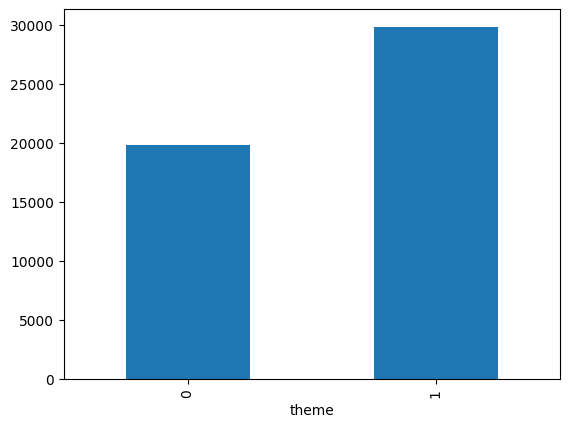

In [7]:
df.groupby(['theme']).size().plot.bar()

In [8]:
df_val

,text,title,description,keywords,theme,url,authors,date,kmonitor_description,kmonitor_title,kmonitor_tags,institutes,people
0,"Ennyiért építi a Strabag, bár a székesfehérvár...","12,6 milliárdba fog kerülni a Sóstói stadion","12,6 milliárdba fog kerülni a Sóstói stadion",egyéb,1,https://blog.atlatszo.hu/2016/12/126-milliardb...,"Erdélyi Katalin,Kis Zoltán,Hont András,Bánhidi...",2016-12-12 00:00:00,"Ennyiért építi a Strabag, bár a székesfehérvár...","12,6 milliárdba fog kerülni a Sóstói stadion","építőipar,közbeszerzés,sport,stadion,túlárazás...","STR Építő Kft.,Strabag,Székesfehérvár Város Ön...",NaN
1,"Írtunk róla a héten, hogy Kovács Katalin anyai...",Kovács Katalin: Nem is gondolok a befejezésre!,Kovács Katalin: Nem is gondolok a befejezésre!,"sport,kajak kenu,kovács katalin,kajak,douchev-...",0,https://24.hu/sport/2013/12/20/kovacs-katalin-...,NaN,2013-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN
2,"Nem akarta magányosan tölteni a karácsonyt, ez...",A neten keresett magának örökbefogadó családot...,A neten keresett magának örökbefogadó családot...,"család,jószívűség,karácsony,ünnep",0,http://24.hu/elet-stilus/2015/12/10/a-neten-ke...,NaN,2015-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN
3,"Klicsko menedzsere úgy fogalmazott, hogy a cím...",Lewis idén nem áll ki Klicsko ellen,Lewis idén nem áll ki Klicsko ellen,sport,0,http://index.hu/sport/boksz/2003/08/04/lewis0804,NaN,2003-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN
4,Sportszerű történet látott napvilágot a Dakar-...,Sportszerűségéért kapott szakaszgyőzelmet egy ...,Sportszerűségéért kapott szakaszgyőzelmet egy ...,"sport,dakar,motorsport,dakar-rali,dakar rali,s...",0,https://24.hu/sport/2019/01/12/sportszerusegee...,NaN,2019-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,"A Fiji Airways bejelentette, hogy hamarosan el...",Ön sem kéri a repülő fedélzetén kínált ételt?,Ön sem kéri a repülő fedélzetén kínált ételt?,"repülés,élelmiszer,légitársaság,repülőgép",0,https://www.napi.hu/nemzetkozi_vallalatok/repu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7680,A cikk emailben történő elküldéséhez kattintso...,Már három embert gyanúsítanak vesztegetéssel a...,Már három embert gyanúsítanak vesztegetéssel a...,NaN,1,https://www.magyaridok.hu/belfold/mar-harom-em...,NaN,NaN,A PestiSrácok.hu hírportál értesülései szerint...,Már három embert gyanúsítanak vesztegetéssel a...,"BKV-Alstom metrókocsik,közlekedés,metró,OLAF-v...",NaN,NaN
7681,GÃ¶rgÃ©nyi ErnÅRuck JÃ¡nosâFelvettÃ¼k a kap...,A Grupo Milton gyulai Ã¼zleti titka,A Grupo Milton gyulai Ã¼zleti titka,"Gyula,befektetÅ,hÃºsipar,Fidesz,Grupo Milton,...",1,https://web.archive.org/web/20100331101645id_/...,NaN,NaN,A menedzsment és a tulajdonosok tudta nélkül m...,A Grupo Milton gyulai üzleti titka,élelmiszeripar,"Fidesz,Grupo Milton Zrt.",Kovács Bence János
7682,A Magyar Szállodaszövetség (MSz) felkéri a dön...,Alacsonyabb áfát szorgalmaznak a szállodások,Alacsonyabb áfát szorgalmaznak a szállodások,"hírek,gazdaság,vállalatvezetés,minőség,logiszt...",0,http://mfor.hu/cikkek/makro/Alacsonyabb_afat_s...,Menedzsment Fórum Kft.,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

labels = {0:0,
          1:1
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['theme']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 50, truncation=True,
                                return_tensors="pt") for text in df['description'] if isinstance(text,str)]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [10]:
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.3):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('SZTAKI-HLT/hubert-base-cc')
        #self.bert = MegatronBertModel.from_pretrained('NYTK/PULI-BERT-Large')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [11]:
def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=32)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [{
        'params':
        [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate':
        0.01
    }, {
        'params':
        [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate':
        0.0
    }]


    optimizer = torch.optim.AdamW(model.parameters(), lr= learning_rate, weight_decay=0.1)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} | Train Accuracy: {total_acc_train / len(train_data): .3f} | Val Loss: {total_loss_val / len(val_data): .3f} | Val Accuracy: {total_acc_val / len(val_data): .3f}')

In [12]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=24)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

In [13]:
print(len(df),len(df_val), len(df_test))

49606 7684 3842


In [14]:
EPOCHS = 2
model = BertClassifier()
LR = 7e-6

train(model, df, df_val, LR, EPOCHS)

Some weights of the model checkpoint at SZTAKI-HLT/hubert-base-cc were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  3%|████▍                                                                                                         

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 model = BertClassifier()                                                                     │
│   3 LR = 7e-6                                                                                    │
│   4                                                                                              │
│ ❱ 5 train(model, df, df_val, LR, EPOCHS)                                                         │
│   6                                                                                              │
│                                                                                                  │
│ in train:41                                                                                      │
│                                                                                                  │
│   38 │   │   │                                                                                   │
│   39 │   │   │   for train_input, train_label in tqdm(train_dataloader):                         │
│   40 │   │   │   │                                                                               │
│ ❱ 41 │   │   │   │   train_label = train_label.to(device)                                        │
│   42 │   │   │   │   mask = train_input['attention_mask'].to(device)                             │
│   43 │   │   │   │   input_id = train_input['input_ids'].squeeze(1).to(device)                   │
│   44                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [ ]:
evaluate(model, df_test)

In [ ]:
torch.save(model.state_dict(), "./kmonitor-bert-title_v2")